# Лабораторная работа 1

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter
import matplotlib.ticker as ticker

In [4]:
test_data = pd.read_csv('vimbox_pages.csv', names = ['id', 'page', 'data'])
test_data.head()

,id,page,data
0,57529,rooms.homework-showcase,2017-03-01 00:00:07.710000
1,57529,rooms.view.step.content,2017-03-01 00:00:10.275000
2,57529,rooms.view.step.content,2017-03-01 00:00:10.436000
3,168671,rooms.view.step.content,2017-03-01 00:00:12.035000
4,168671,rooms.view.step.content,2017-03-01 00:00:50.632000


Исходная таблица "vimbox_pages.csv" со строками  
* <идентификатор-пользователя>,
* <страница>,
* <дата-время посещения>  
 
преобразовывается в таблицу "laba_1.csv" 
* <идентификатор-пользователя>,
* <дата-время начала сессии>,
* <дата-время окончания сессии>.  

с помощью SQL запроса "laba_1.sql"

In [5]:
data = pd.read_csv('laba_1.csv')
data.start_session = pd.to_datetime(data['start_session'])
data.end_session = pd.to_datetime(data['end_session'])

In [6]:
data.head()

,id,start_session,end_session
0,2231,2017-03-01 05:38:50.983,2017-03-01 07:01:20.771
1,3301,2017-03-01 15:28:55.189,2017-03-01 17:53:59.630
2,3339,2017-03-01 16:01:40.039,2017-03-01 17:50:29.813
3,5487,2017-03-01 15:13:55.623,2017-03-01 16:57:26.575
4,6127,2017-03-01 18:15:02.449,2017-03-01 19:54:56.895


In [7]:
duration = data.end_session - data.start_session
hours = duration / np.timedelta64(1, 'h')

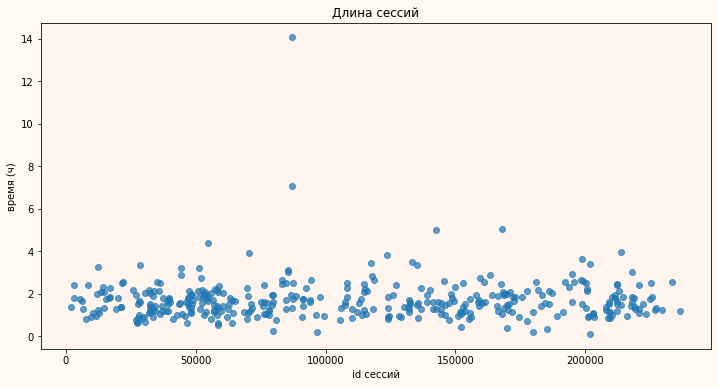

In [8]:
fig, ax = plt.subplots()

ax.scatter(data.id, hours, alpha = 0.7)

ax.set_facecolor('seashell')
fig.set_facecolor('floralwhite')
fig.set_figwidth(12)    
fig.set_figheight(6) 
ax.set_xlabel('id сессий')
ax.set_ylabel('время (ч)')
ax.set_title('Длина сессий')

plt.show()

### 1) В основном сессии длятся около 1-2 часов 

In [31]:
start = data.start_session.dt.hour
end = data.end_session.dt.hour
times = []
for i in range(len(data)):
    times.append(list(range(start[i], end[i]+1)))
times = [a for b in times for a in b]
cnt = dict(Counter(times))

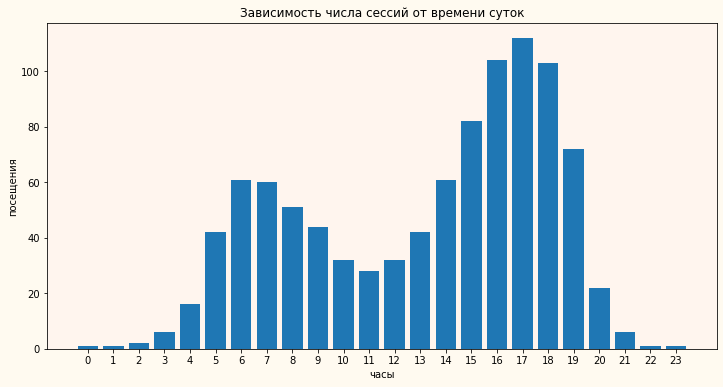

In [34]:
x = cnt.keys()
y = cnt.values()

fig, ax = plt.subplots()

ax.bar(x, y)
ax.xaxis.set_major_locator(ticker.MultipleLocator(1))

ax.set_facecolor('seashell')
fig.set_facecolor('floralwhite')
fig.set_figwidth(12)  
fig.set_figheight(6)   
ax.set_xlabel('часы')
ax.set_ylabel('посещения')
ax.set_title('Зависимость числа сессий от времени суток')
plt.xticks(range(24))

plt.show()

### 2) Высокий спрос наблюдается с утра и к вечеру, пик сессий приходится на 15-18 часов

### 3) Необычные сессии - длительностью около 14 часов и сессии с ночной активностью